# 1.1 EDA , SQL section.

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
import ftfy
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import csv
from sqlalchemy import create_engine
sns.set_style('white')

### Loading dataset into a pandas dataframe.

In [3]:
economic_df = pd.read_csv('Full-Economic-News-DFE-839861.csv', encoding='utf-8')

In [4]:
economic_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/2015 17:48:27,3.0,0.6400,yes,0.640,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/2015 16:54:25,NaN,NaN,no,1.000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/2015 01:59:03,NaN,NaN,no,1.000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/2015 02:19:39,NaN,0.0000,no,0.675,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/2015 17:48:27,3.0,0.3257,yes,0.640,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


Here are the variable descriptions:

|Variable|Description|
|:-:|:--|
|**_unit_id**|ID for each row|
|**_golden**|Boolean variable|
|**_unit_state**|Represents if article has been completed|
|**trusted_judgments**|The judgment of the article|
|**_last_judgment_at**|The date of the last judment|
|**positivity**|A score how the positivity of the article|
|**positivity:confidence**|The confidence of the positivity score|
|**relevance**|Whether the article is relevant or not|
|**relevance:confidence**|The confidence on the relevance of the article|
|**articleid**|The id of each article. Note wsj indicates it was published in the Wall Street Journal|
|**date**|When the article was published|
|**headline**|The headline of the article|
|**positivity_gold**|If the positivity is gold|
|**relevance_gold**|The relevance of the gold positivity|
|**text**|The body of the economic article|


In [5]:
def lowercase_df(df):
    """
    Function to lowercase and replace periods, colon & spaces in the column names of a dataframe.
    """
    new_names = []
    for col in df.columns:
        new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower().replace(':','_', len(col)).lower())

    df.columns = new_names
    return df.columns

In [6]:
lowercase_df(economic_df)

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity', 'positivity_confidence', 'relevance',
       'relevance_confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold', 'text'],
      dtype='object')

#### Creating a list of new column names.

In [7]:
new_column_names = ['unit_id', 'golden', 'unit_state', 'trusted_judgments', 'last_judgment_at','positivity', 'positivity_confidence', 'relevance', 'relevance_confidence', 'article_id', 'article_date', 'article_headline', 'positivity_gold', 'relevance_gold', 'article_text']

#### Renaming columns of dataframe.

In [8]:
economic_df.columns = new_column_names

In [9]:
economic_df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,positivity,positivity_confidence,relevance,relevance_confidence,article_id,article_date,article_headline,positivity_gold,relevance_gold,article_text
0,842613455,False,finalized,3,12/5/2015 17:48:27,3.0,0.6400,yes,0.640,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/2015 16:54:25,NaN,NaN,no,1.000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/2015 01:59:03,NaN,NaN,no,1.000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/2015 02:19:39,NaN,0.0000,no,0.675,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/2015 17:48:27,3.0,0.3257,yes,0.640,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [10]:
economic_df.shape

(8000, 15)

## EDA

In [11]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
unit_id                  8000 non-null int64
golden                   8000 non-null bool
unit_state               8000 non-null object
trusted_judgments        8000 non-null int64
last_judgment_at         8000 non-null object
positivity               1420 non-null float64
positivity_confidence    3775 non-null float64
relevance                8000 non-null object
relevance_confidence     8000 non-null float64
article_id               8000 non-null object
article_date             8000 non-null object
article_headline         8000 non-null object
positivity_gold          0 non-null float64
relevance_gold           0 non-null float64
article_text             8000 non-null object
dtypes: bool(1), float64(5), int64(2), object(7)
memory usage: 882.9+ KB


#### One possible label is `relevance`. Let's explore the values:

In [12]:
economic_df.relevance.value_counts()

no          6571
yes         1420
not sure       9
Name: relevance, dtype: int64

#### Converting variable `relevance` to numerical values.

In [13]:
economic_df['relevance'] = economic_df['relevance'].apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else 2)

In [14]:
economic_df.relevance.value_counts()

0    6571
1    1420
2       9
Name: relevance, dtype: int64

#### Since we have so little `relevance` with value `2`, let's convert them to `0` (not relevant).

In [15]:
economic_df['relevance'] = economic_df['relevance'].apply(lambda x: 0 if x == 2 else x)

In [16]:
economic_df.relevance.value_counts()

0    6580
1    1420
Name: relevance, dtype: int64

#### The labels/classes are clearly unbalanced.

In [17]:
economic_df.relevance.value_counts()*100/len(economic_df.relevance)

0    82.25
1    17.75
Name: relevance, dtype: float64

In [18]:
economic_df.describe()

,unit_id,trusted_judgments,positivity,positivity_confidence,relevance,relevance_confidence,positivity_gold,relevance_gold
count,8.000000e+03,8000.0,1420.000000,3775.000000,8000.000000,8000.000000,0.0,0.0
mean,8.367995e+08,3.0,4.985211,0.188450,0.177500,0.859009,NaN,NaN
std,5.816278e+06,0.0,1.680357,0.269593,0.382115,0.166180,NaN,NaN
min,8.309816e+08,3.0,2.000000,0.000000,0.000000,0.336400,NaN,NaN
25%,8.309836e+08,3.0,3.000000,0.000000,0.000000,0.669700,NaN,NaN
50%,8.367995e+08,3.0,5.000000,0.000000,0.000000,1.000000,NaN,NaN
75%,8.426155e+08,3.0,7.000000,0.345800,0.000000,1.000000,NaN,NaN
max,8.426175e+08,3.0,9.000000,1.000000,1.000000,1.000000,NaN,NaN


#### Since we have numerical and text data in the dataframe, we perform a describe just for our text data:

In [19]:
economic_df[['article_headline','article_text']].describe()

,article_headline,article_text
count,8000,8000
unique,7698,7994
top,Business and Finance,The crosscurrents roiling the bond market inte...
freq,86,2


#### Let's use groupby `relevance` to use describe by `headline` and `text`:

In [20]:
economic_df.groupby('relevance')['article_headline'].describe()

relevance        
0          count                     6580
           unique                    6384
           top                     DIGEST
           freq                        43
1          count                     1420
           unique                    1330
           top       Business and Finance
           freq                        58
Name: article_headline, dtype: object

In [21]:
economic_df.groupby('relevance')['article_text'].describe()

relevance        
0          count                                                  6580
           unique                                                 6574
           top       The economic slump has yet to damp innovation ...
           freq                                                      2
1          count                                                  1420
           unique                                                 1420
           top       Stocks struggled to eke out gains, as weak eco...
           freq                                                      1
Name: article_text, dtype: object

#### Let's make new columns with the lenght of headlines and articles:

In [22]:
economic_df['headline_length'] = economic_df['article_headline'].apply(len)
economic_df['article_length'] = economic_df['article_text'].apply(len)
economic_df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,positivity,positivity_confidence,relevance,relevance_confidence,article_id,article_date,article_headline,positivity_gold,relevance_gold,article_text,headline_length,article_length
0,842613455,False,finalized,3,12/5/2015 17:48:27,3.0,0.6400,1,0.640,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...,37,1059
1,842613456,False,finalized,3,12/5/2015 16:54:25,NaN,NaN,0,1.000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...,69,2553
2,842613457,False,finalized,3,12/5/2015 01:59:03,NaN,NaN,0,1.000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...,118,1474
3,842613458,False,finalized,3,12/5/2015 02:19:39,NaN,0.0000,0,0.675,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...,60,2673
4,842613459,False,finalized,3,12/5/2015 17:48:27,3.0,0.3257,1,0.640,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...,77,1071


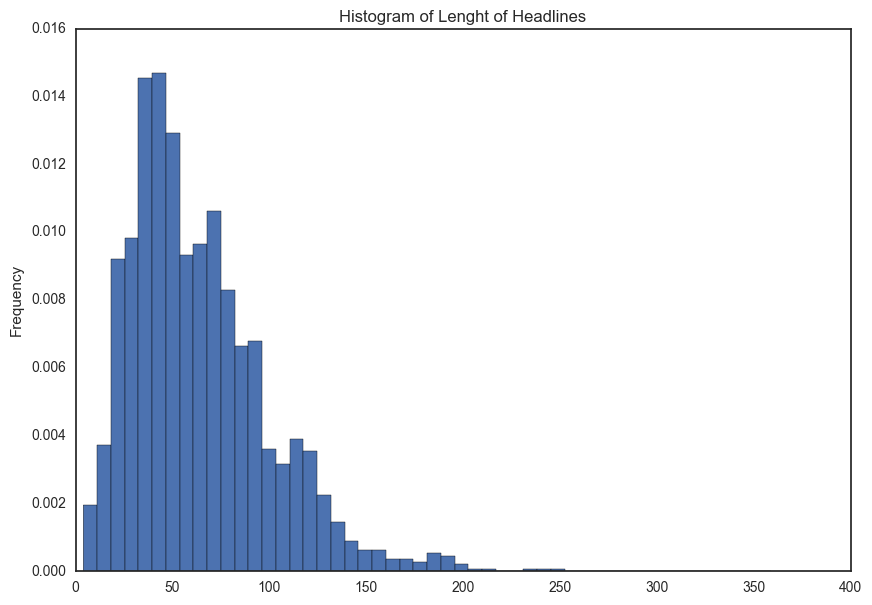

In [23]:
economic_df['headline_length'].plot(bins=50, kind='hist', figsize=(10,7), normed=True, title="Histogram of Lenght of Headlines");

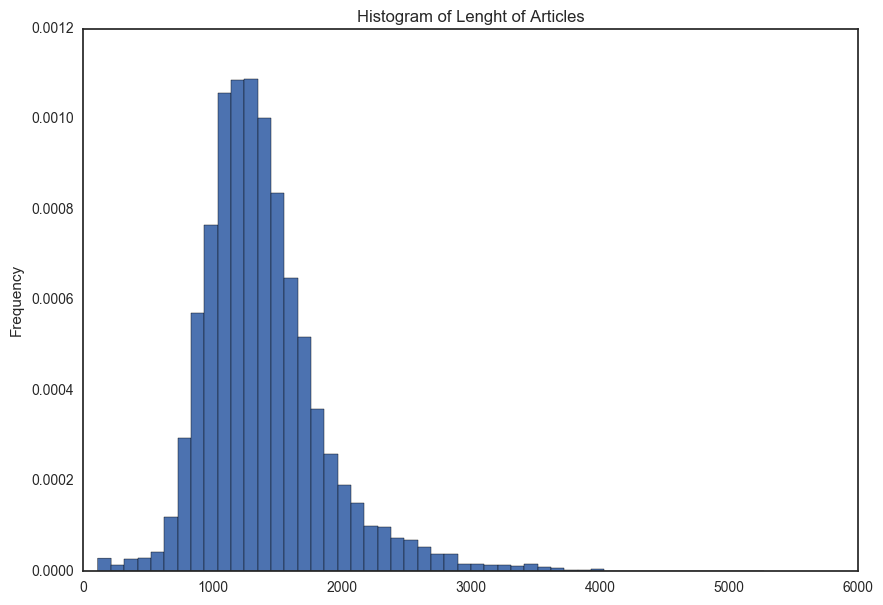

In [24]:
economic_df['article_length'].plot(bins=50, kind='hist',figsize=(10,7), normed=True, title="Histogram of Lenght of Articles");

In [25]:
economic_df['headline_length'].describe()

count    8000.000000
mean       63.708125
std        35.844306
min         4.000000
25%        38.000000
50%        56.000000
75%        83.000000
max       359.000000
Name: headline_length, dtype: float64

>There's a headline with 359 characters. Let's find out what's the content:

In [26]:
economic_df[economic_df['headline_length'] == 359]['article_headline'].iloc[0]

"A LOOK AT. . . The Gyrating Markets; IS THE BOOM OVER? The value of stock, particularly in high-tech companies, spiked sharply last week, though not enough to ease the fears of some investors who've watched their portfolios plummet since Labor Day. Two economic observers offer conflicting views on what happens next.; Relax, the Old Economy Will Save the New"

>When was the headline published?

In [27]:
economic_df[economic_df['headline_length'] == 359]['article_date'].iloc[0]

'2000-12-10'

>What's the content of the related article?

In [28]:
economic_df[economic_df['headline_length'] == 359]['article_text'].iloc[0]

'Last summer, as the NASDAQ temporarily staggered back from its spring drubbing, a still brash Internet company ran a full-page newspaper ad with a bold and memorable line: "Thanks, old economy, we\'ll take it from here."</br></br>The ad got it exactly wrong. With the technology-heavy NASDAQ stock exchange about 40 percent below its March highs, the new economy no longer seems limitless. The American economy is entering an economic downturn. But even as the new economy implodes, the old economy will sustain us. This is a good thing: It means that the slowdown will be short and shallow after an impossibly long economic boom.</br></br>There will be other ironies in the coming months, the juiciest of which will be that old economy firms will surf the downturn more easily precisely because they have aggressively adopted high technology and made effective use of the massive structural shifts unleashed by New Economy forces.</br></br>Make no mistake, the downturn will feel awful. Going from 

In [29]:
economic_df['article_length'].describe()

count    8000.000000
mean     1396.873750
std       475.750083
min       112.000000
25%      1096.000000
50%      1323.000000
75%      1606.000000
max      5273.000000
Name: article_length, dtype: float64

>There's an article with 5,273 characters. Let's find out what's the content:

In [30]:
economic_df[economic_df['article_length'] == 5273]['article_text'].iloc[0]

"THEY HAVE BEEN thinking the unthinkable again in certain quarters of government, and the question now is whether they are also going to try to do the non-doable. Some time in the next few days, the president is expected to decide just how much money he will ask from Congress for a stepped-up program of civil defense. Around $95 million annually has already been dished out for this confused and wasteful program; and only recently has the government arranged to free up those funds for expenditure on more manageable and familiar, if less exotic, emergencies than those likely to attend nuclear war. Now there are pressures on Mr. Carter to add substantially to these funds for the purpose of getting a civil-defense evacuation project under way. The current scuttlebutt has it that he is resisting. We fervently hope this is the case.</br></br>Since the advent of nuclear explosives and of missiles that can hurl them halfway around the world in a matter of minutes, the subject of civil defense 

>When was it published?

In [31]:
economic_df[economic_df['article_length'] == 5273]['article_date'].iloc[0]

'1978-12-15'

>What was the associated headline?

In [32]:
economic_df[economic_df['article_length'] == 5273]['article_headline'].iloc[0]

'A 2 2 FRIDAY, DECEMBER IS, 1978  '

#### From the histogram below, we can see that relevant articles have less characters:

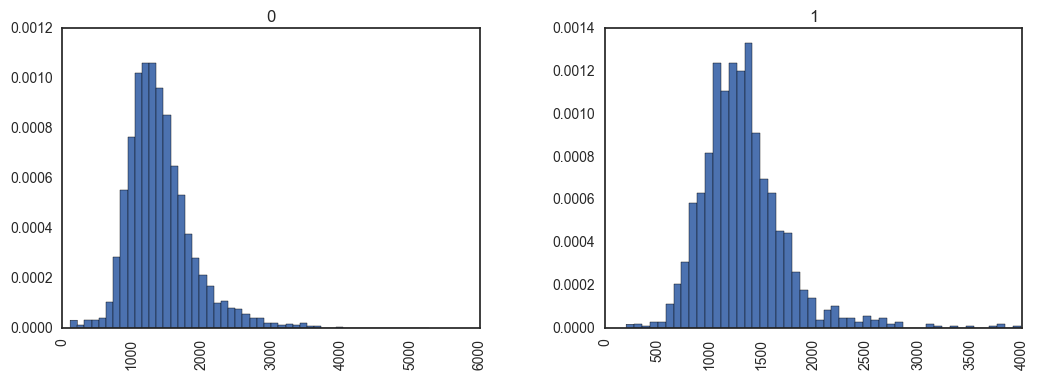

In [33]:
economic_df.hist(column='article_length', by='relevance', normed=True, bins=50, figsize=(12,4));

#### Same applies to the headlines, but the distribution has multiple modes when it's `relevant`:

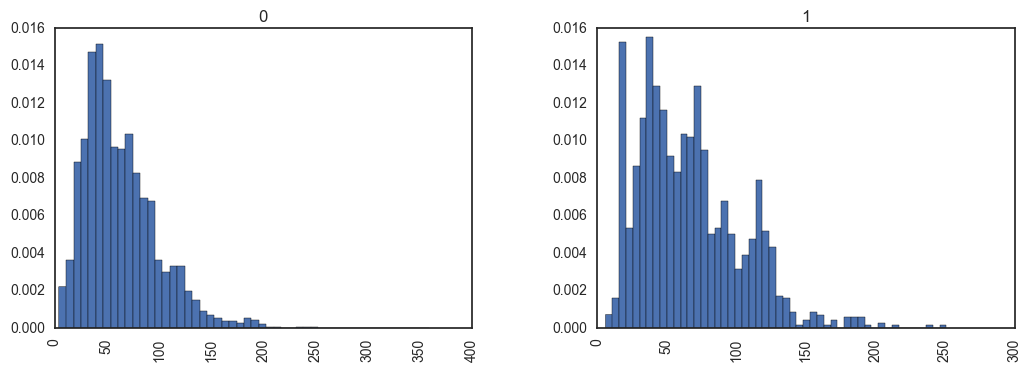

In [34]:
economic_df.hist(column='headline_length', by='relevance', normed=True, bins=50, figsize=(12,4));

### SQL

In [35]:
%load_ext sql

In [36]:
%sql sqlite://

'Connected: None@None'

In [37]:
%%sql
DROP TABLE IF EXISTS economic_articles;

Done.


[]

In [38]:
if len(economic_df) == 0:
    engine = create_engine('sqlite:///economic_articles.db')
    conn = engine.connect()
    economic_df.to_sql('economic_articles', conn)

In [39]:
%sql sqlite:///economic_articles.db

'Connected: None@economic_articles.db'

In [40]:
%%sql
SELECT name FROM sqlite_master WHERE type = "table";

Done.


name
economic_articles


In [41]:
%%sql
SELECT DISTINCT(unit_state) AS Count FROM economic_articles

Done.


Count
finalized


#### Converting variable `unit_state` to numerical values.

In [42]:
economic_df['unit_state'] = economic_df['unit_state'].apply(lambda x: 1 if x == 'finalized' else 0)

In [43]:
%%sql
SELECT DISTINCT(golden) AS Count FROM economic_articles

Done.


Count
0


#### Converting variable 'golden' to numerical values.

In [44]:
economic_df['golden'] = economic_df['golden'].apply(lambda x: 0 if x == False else 1)

In [45]:
%%sql
SELECT DISTINCT(positivity_gold) AS Count FROM economic_articles

Done.


Count
None


In [46]:
%%sql
SELECT DISTINCT(relevance_gold) AS Count FROM economic_articles

Done.


Count
None


#### Since columns `positivity_gold` and `relevance_gold` are empty, we can drop them.

In [47]:
del economic_df['positivity_gold']

In [48]:
del economic_df['relevance_gold']

#### Converting `last_judgment_at` and `article_date` to datetime.

In [49]:
economic_df['last_judgment_at'] = pd.to_datetime(economic_df['last_judgment_at'])

In [50]:
economic_df['article_date'] = pd.to_datetime(economic_df['article_date'])

In [51]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
unit_id                  8000 non-null int64
golden                   8000 non-null int64
unit_state               8000 non-null int64
trusted_judgments        8000 non-null int64
last_judgment_at         8000 non-null datetime64[ns]
positivity               1420 non-null float64
positivity_confidence    3775 non-null float64
relevance                8000 non-null int64
relevance_confidence     8000 non-null float64
article_id               8000 non-null object
article_date             8000 non-null datetime64[ns]
article_headline         8000 non-null object
article_text             8000 non-null object
headline_length          8000 non-null int64
article_length           8000 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(7), object(3)
memory usage: 937.6+ KB


In [52]:
economic_df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,positivity,positivity_confidence,relevance,relevance_confidence,article_id,article_date,article_headline,article_text,headline_length,article_length
0,842613455,0,1,3,2015-12-05 17:48:27,3.0,0.6400,1,0.640,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,37,1059
1,842613456,0,1,3,2015-12-05 16:54:25,NaN,NaN,0,1.000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,69,2553
2,842613457,0,1,3,2015-12-05 01:59:03,NaN,NaN,0,1.000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,118,1474
3,842613458,0,1,3,2015-12-05 02:19:39,NaN,0.0000,0,0.675,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,60,2673
4,842613459,0,1,3,2015-12-05 17:48:27,3.0,0.3257,1,0.640,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,77,1071


In [53]:
%%sql
SELECT DISTINCT(positivity) AS Count FROM economic_articles

Done.


Count
3.0
None
4.0
7.0
6.0
2.0
8.0
5.0
9.0


#### Let's look at our other label `positivity` and check how the classes are distributed.

In [54]:
economic_df.groupby('positivity')['relevance'].describe()

positivity       
2.0         count     35.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
            max        1.0
3.0         count    343.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
            max        1.0
4.0         count    255.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
            max        1.0
5.0         count    205.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
                     ...  
6.0         std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
          

In [55]:
economic_df.positivity.value_counts()*100/len(economic_df.positivity)

3.0    4.2875
7.0    3.6875
4.0    3.1875
6.0    2.6750
5.0    2.5625
8.0    0.8875
2.0    0.4375
9.0    0.0250
Name: positivity, dtype: float64

>Above values are too low. We need to check by selecting only rows where `positivity` is not null.

In [56]:
economic_df_positivity_not_null = economic_df[economic_df['positivity'].notnull()]

In [57]:
economic_df_positivity_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 7995
Data columns (total 15 columns):
unit_id                  1420 non-null int64
golden                   1420 non-null int64
unit_state               1420 non-null int64
trusted_judgments        1420 non-null int64
last_judgment_at         1420 non-null datetime64[ns]
positivity               1420 non-null float64
positivity_confidence    1420 non-null float64
relevance                1420 non-null int64
relevance_confidence     1420 non-null float64
article_id               1420 non-null object
article_date             1420 non-null datetime64[ns]
article_headline         1420 non-null object
article_text             1420 non-null object
headline_length          1420 non-null int64
article_length           1420 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(7), object(3)
memory usage: 177.5+ KB


In [58]:
economic_df_positivity_not_null.groupby('positivity')['relevance'].describe()

positivity       
2.0         count     35.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
            max        1.0
3.0         count    343.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
            max        1.0
4.0         count    255.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
            max        1.0
5.0         count    205.0
            mean       1.0
            std        0.0
            min        1.0
            25%        1.0
            50%        1.0
                     ...  
6.0         std        0.0
            min        1.0
            25%        1.0
            50%        1.0
            75%        1.0
          

In [59]:
economic_df_positivity_not_null.positivity.value_counts()*100/len(economic_df_positivity_not_null.positivity)

3.0    24.154930
7.0    20.774648
4.0    17.957746
6.0    15.070423
5.0    14.436620
8.0     5.000000
2.0     2.464789
9.0     0.140845
Name: positivity, dtype: float64

>Most of the articles where `positivity` is not null have a value of `3` or `7`.

#### Let's look at different histograms of the lenght of the articles and headlines based on the positivity. Note that we only have `1420` observations out of `8000`.

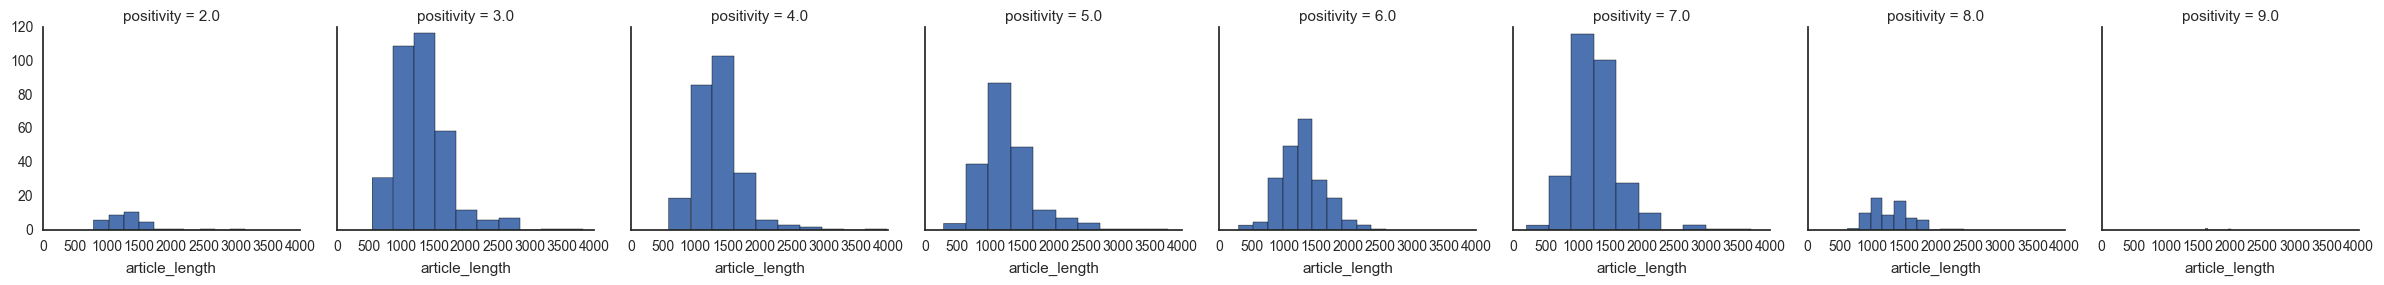

In [60]:
positive_grid = sns.FacetGrid(economic_df, col='positivity')
positive_grid.map(plt.hist, 'article_length');

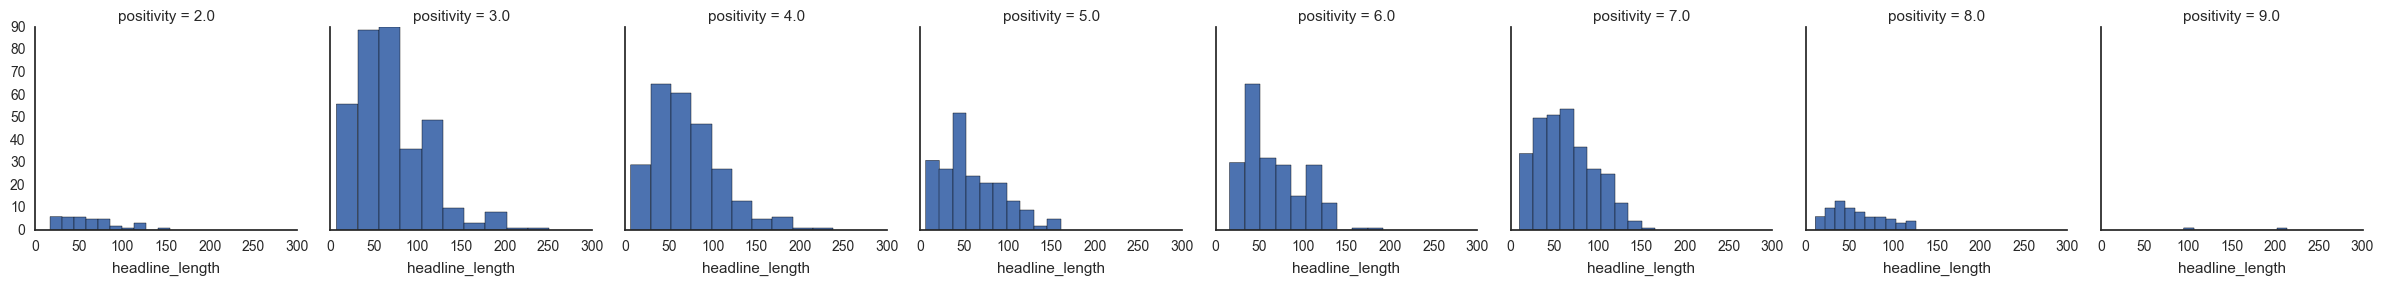

In [61]:
positive_grid = sns.FacetGrid(economic_df, col='positivity')
positive_grid.map(plt.hist, 'headline_length');

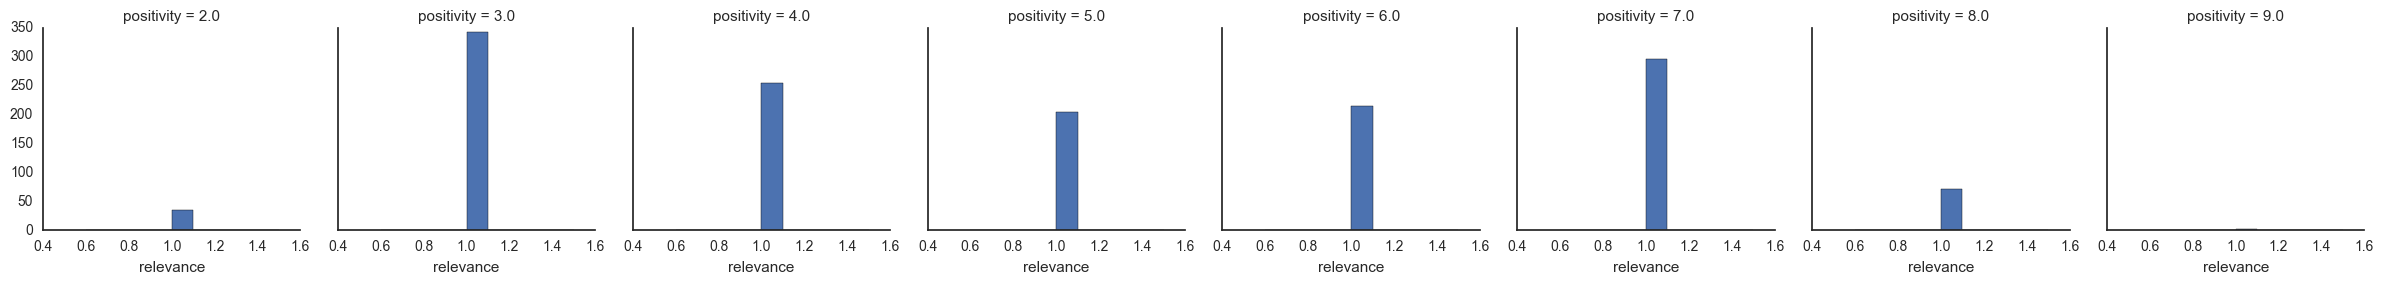

In [62]:
positive_grid = sns.FacetGrid(economic_df, col='positivity')
positive_grid.map(plt.hist, 'relevance');

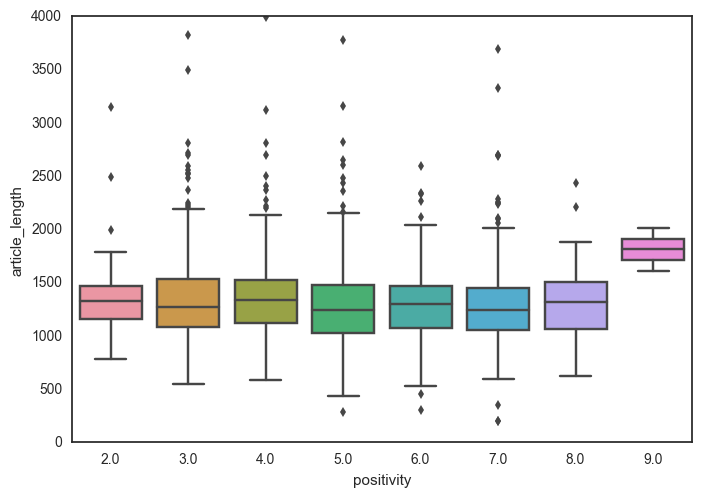

In [63]:
sns.boxplot(x='positivity', y='article_length', data=economic_df);

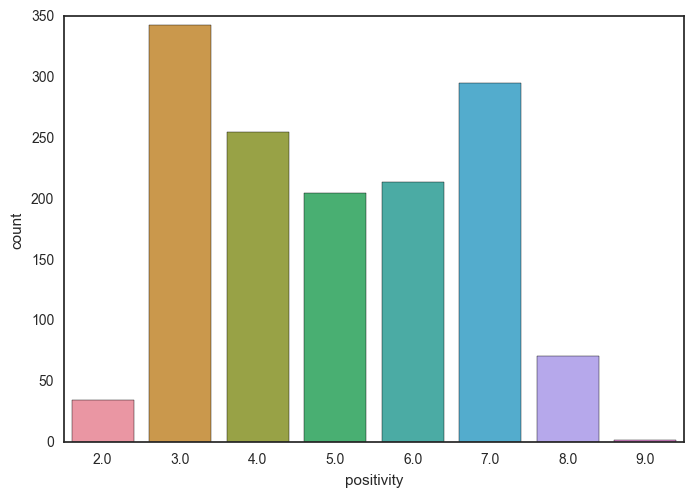

In [64]:
sns.countplot(x='positivity', data=economic_df);

In [65]:
economic_pos = economic_df.groupby('positivity').mean()
economic_pos

,unit_id,golden,unit_state,trusted_judgments,positivity_confidence,relevance,relevance_confidence,headline_length,article_length
positivity,,,,,,,,,
2.0,8.369658e+08,0.0,1.0,3.0,0.413189,1.0,0.759471,62.428571,1370.742857
3.0,8.389869e+08,0.0,1.0,3.0,0.555079,1.0,0.776000,69.810496,1341.763848
4.0,8.396049e+08,0.0,1.0,3.0,0.489844,1.0,0.769128,72.047059,1371.815686
5.0,8.369983e+08,0.0,1.0,3.0,0.446314,1.0,0.735245,58.970732,1295.868293
6.0,8.398432e+08,0.0,1.0,3.0,0.508080,1.0,0.778521,66.196262,1300.621495
7.0,8.389880e+08,0.0,1.0,3.0,0.518729,1.0,0.777911,64.125424,1286.637288
8.0,8.344241e+08,0.0,1.0,3.0,0.380755,1.0,0.739646,57.957746,1306.802817
9.0,8.426164e+08,0.0,1.0,3.0,0.676700,1.0,0.840500,154.500000,1812.500000


In [66]:
%%sql
SELECT DISTINCT(positivity_confidence) AS Count FROM economic_articles

Done.


Count
0.64
None
0.0
0.3257
0.6783
0.6657
0.3388
0.6422
0.6207
0.3571


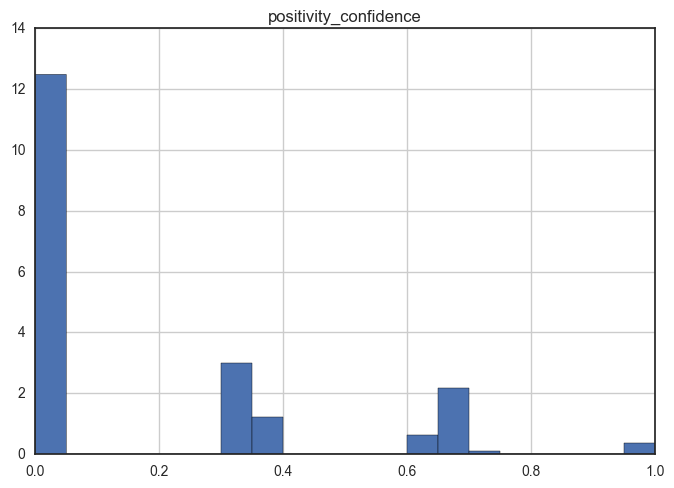

In [67]:
economic_df.hist(column='positivity_confidence', bins=20, normed=True);

#### Creating and inserting date related objects.

In [68]:
economic_df.insert(11,'article_year', economic_df['article_date'].apply(lambda x: x.year))
economic_df.insert(12,'article_month', economic_df['article_date'].apply(lambda x: x.month))
economic_df.insert(13,'article_day', economic_df['article_date'].apply(lambda x: x.day))
economic_df.insert(14,'article_dayofweek', economic_df['article_date'].apply(lambda x: x.dayofweek))

#### Let's replace NaN with the mean of their column.

In [69]:
economic_df.fillna(economic_df.mean(), inplace=True)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,positivity,positivity_confidence,relevance,relevance_confidence,article_id,article_date,article_year,article_month,article_day,article_dayofweek,article_headline,article_text,headline_length,article_length
0,842613455,0,1,3,2015-12-05 17:48:27,3.000000,0.64000,1,0.6400,wsj_398217788,1991-08-14,1991,8,14,2,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,37,1059
1,842613456,0,1,3,2015-12-05 16:54:25,4.985211,0.18845,0,1.0000,wsj_399019502,2007-08-21,2007,8,21,1,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,69,2553
2,842613457,0,1,3,2015-12-05 01:59:03,4.985211,0.18845,0,1.0000,wsj_398284048,1991-11-14,1991,11,14,3,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,118,1474
3,842613458,0,1,3,2015-12-05 02:19:39,4.985211,0.00000,0,0.6750,wsj_397959018,1986-06-16,1986,6,16,0,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,60,2673
4,842613459,0,1,3,2015-12-05 17:48:27,3.000000,0.32570,1,0.6400,wsj_398838054,2002-10-04,2002,10,4,4,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,77,1071
5,842613460,0,1,3,2015-12-04 23:15:05,3.000000,0.67830,1,1.0000,wsj_905654974,2011-11-23,2011,11,23,2,"Stocks Fall Again; BofA, Alcoa Slide","Stocks declined, as investors weighed slower-t...",36,765
6,842613461,0,1,3,2015-12-05 07:35:50,4.985211,0.00000,0,0.6496,wsj_398739166,2001-05-24,2001,5,24,3,"Bank of Montreal, Royal Bank Profits Rose in 2...",TORONTO -- Royal Bank of Canada and Bank of Mo...,55,1633
7,842613462,0,1,3,2015-12-05 17:22:11,4.985211,0.18845,0,1.0000,wsj_397957465,1986-10-22,1986,10,22,2,Battle Over Medical Costs Isn't Over,Many people think that the monster of health-c...,36,3366
8,842613463,0,1,3,2015-12-04 23:07:28,4.985211,0.18845,0,1.0000,wsj_398737834,2001-05-30,2001,5,30,2,Sequenom to Buy Gemini Genomics In Stock Accord,"Sequenom Inc., a genomics-based biotechnology ...",47,1544
9,842613464,0,1,3,2015-12-05 18:40:28,4.000000,0.66570,1,1.0000,wsj_397912506,1984-11-01,1984,11,1,3,U.S. Dollar Falls Against Most Currencies; Dec...,The U.S. dollar declined against most major fo...,83,1125


In [70]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
unit_id                  8000 non-null int64
golden                   8000 non-null int64
unit_state               8000 non-null int64
trusted_judgments        8000 non-null int64
last_judgment_at         8000 non-null datetime64[ns]
positivity               8000 non-null float64
positivity_confidence    8000 non-null float64
relevance                8000 non-null int64
relevance_confidence     8000 non-null float64
article_id               8000 non-null object
article_date             8000 non-null datetime64[ns]
article_year             8000 non-null int64
article_month            8000 non-null int64
article_day              8000 non-null int64
article_dayofweek        8000 non-null int64
article_headline         8000 non-null object
article_text             8000 non-null object
headline_length          8000 non-null int64
article_length           8000 non-null int64
dtypes: dat

#### Now that we have inputted missing values for `positivity`, let's see the effect on the histograms per article and headline length,

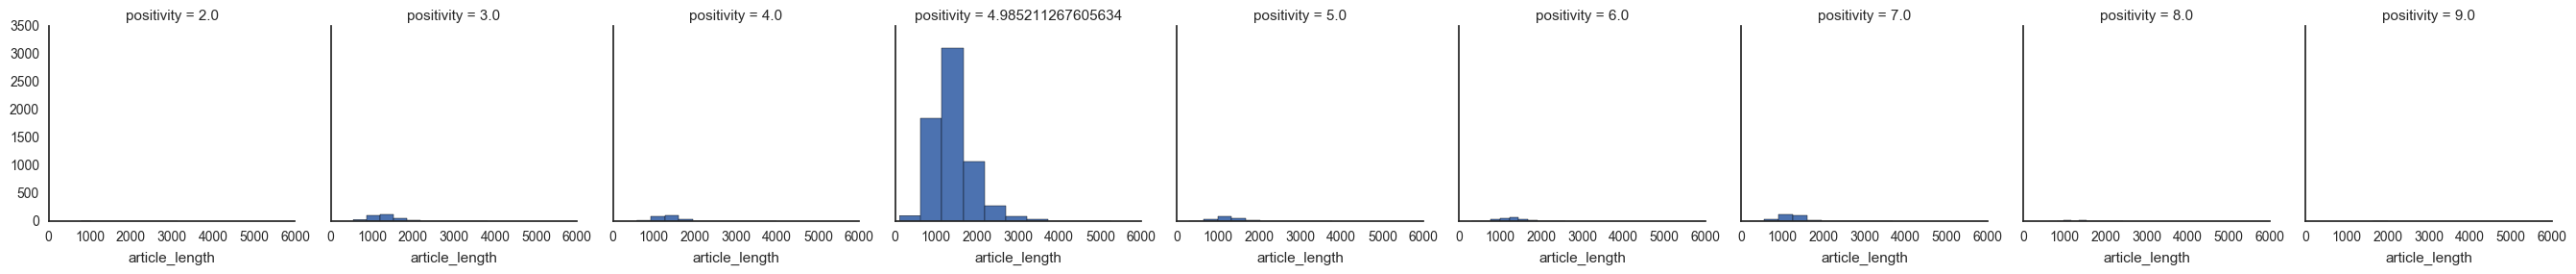

In [71]:
positive_grid = sns.FacetGrid(economic_df, col='positivity')
positive_grid.map(plt.hist, 'article_length');

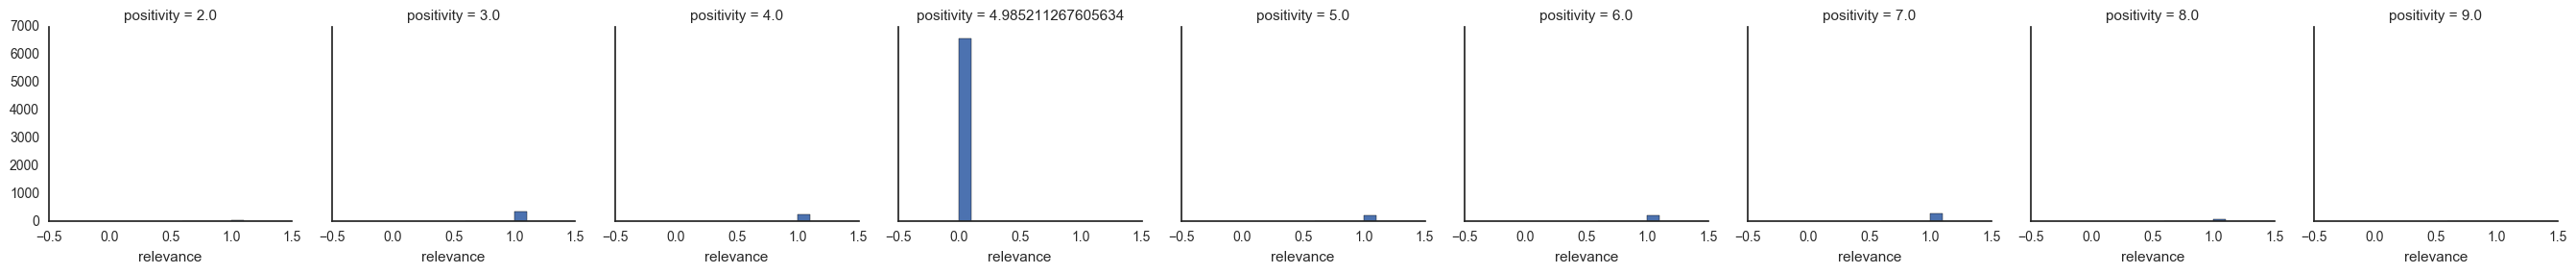

In [72]:
positive_grid = sns.FacetGrid(economic_df, col='positivity')
positive_grid.map(plt.hist, 'relevance');

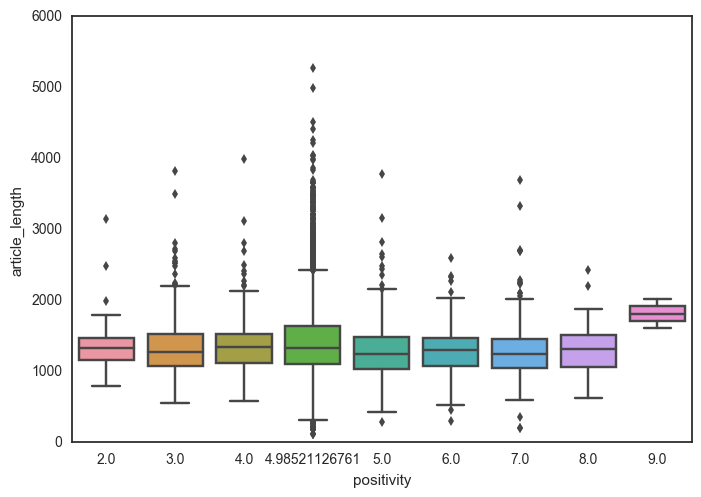

In [73]:
sns.boxplot(x='positivity', y='article_length', data=economic_df);

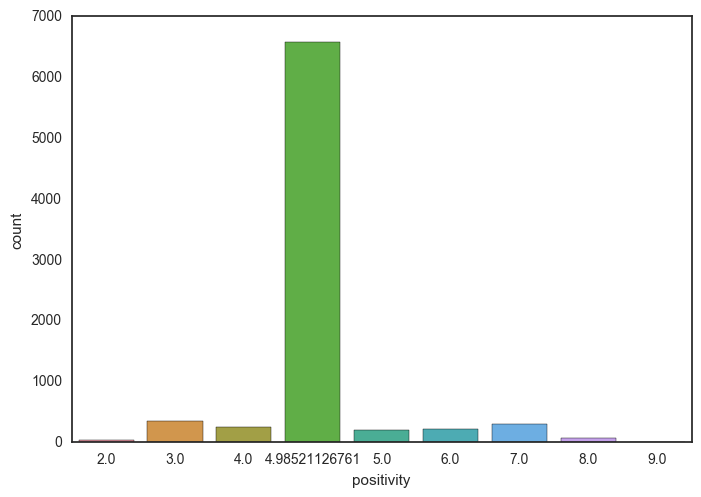

In [74]:
sns.countplot(x='positivity', data=economic_df);

>The effect of inputting the missing values of `positivity` as the mean is very "distorting" as we had `8000 - 1420 = 6580` missing observations. It introduces outliers.

In [75]:
economic_pos = economic_df.groupby('positivity').mean()
economic_pos

,unit_id,golden,unit_state,trusted_judgments,positivity_confidence,relevance,relevance_confidence,article_year,article_month,article_day,article_dayofweek,headline_length,article_length
positivity,,,,,,,,,,,,,
2.000000,8.369658e+08,0.0,1.0,3.0,0.413189,1.0,0.759471,1996.142857,6.685714,12.114286,3.000000,62.428571,1370.742857
3.000000,8.389869e+08,0.0,1.0,3.0,0.555079,1.0,0.776000,1996.119534,6.641399,15.699708,2.536443,69.810496,1341.763848
4.000000,8.396049e+08,0.0,1.0,3.0,0.489844,1.0,0.769128,1996.000000,6.694118,14.925490,2.611765,72.047059,1371.815686
4.985211,8.363965e+08,0.0,1.0,3.0,0.121003,0.0,0.878752,1993.409271,6.458815,15.623404,2.803040,63.156079,1412.921581
5.000000,8.369983e+08,0.0,1.0,3.0,0.446314,1.0,0.735245,1993.224390,6.424390,15.565854,2.614634,58.970732,1295.868293
6.000000,8.398432e+08,0.0,1.0,3.0,0.508080,1.0,0.778521,1997.205607,6.733645,15.672897,2.607477,66.196262,1300.621495
7.000000,8.389880e+08,0.0,1.0,3.0,0.518729,1.0,0.777911,1994.820339,6.193220,15.230508,2.501695,64.125424,1286.637288
8.000000,8.344241e+08,0.0,1.0,3.0,0.380755,1.0,0.739646,1992.464789,6.084507,14.676056,2.788732,57.957746,1306.802817
9.000000,8.426164e+08,0.0,1.0,3.0,0.676700,1.0,0.840500,1996.500000,3.500000,6.000000,1.000000,154.500000,1812.500000


### Some more EDA

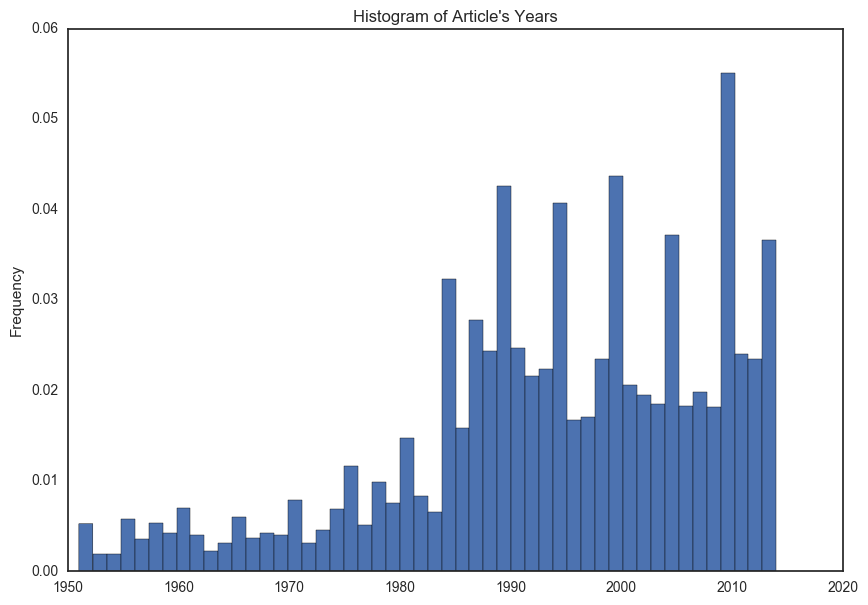

In [76]:
economic_df.article_year.plot(kind='hist', bins=50, figsize=(10,7), normed=True, title="Histogram of Article's Years");

In [77]:
economic_df['article_year'].max()

2014

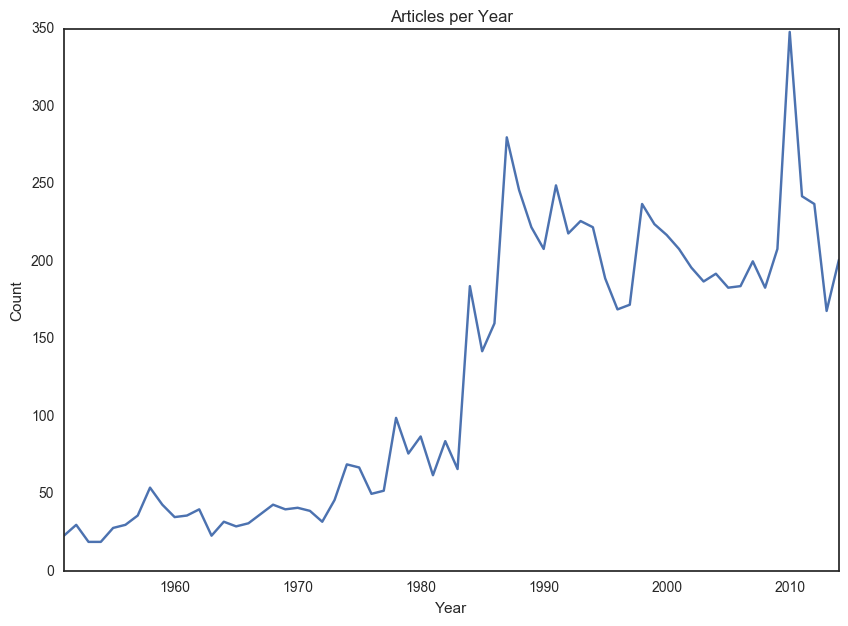

In [78]:
articles_year_plot = economic_df.groupby(economic_df['article_year']).count()['article_text'].plot(kind='line',figsize=(10,7),legend=False, title="Articles per Year")
articles_year_plot.set(xlabel='Year', ylabel='Count');

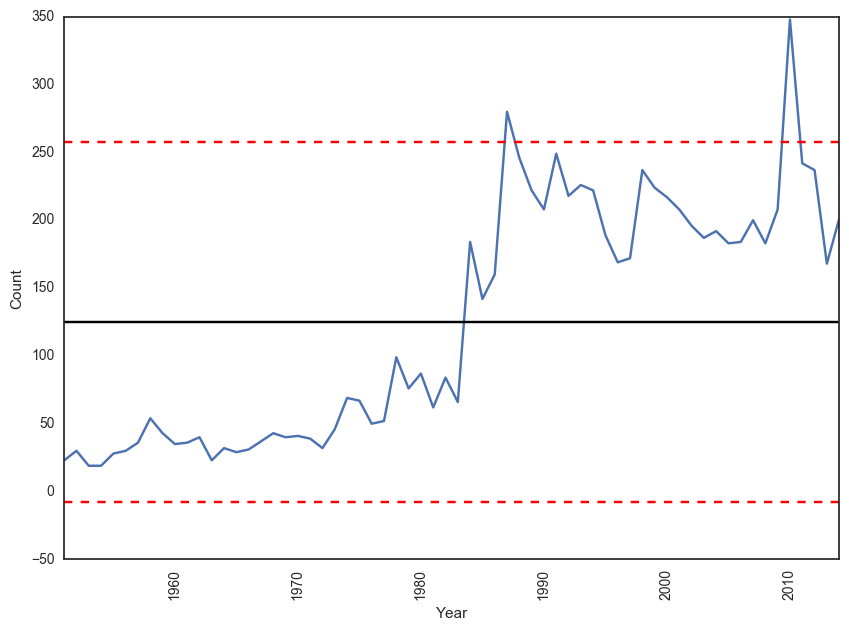

In [79]:
plot_articles = economic_df.groupby(economic_df['article_year']).count()['article_text'].plot(rot=90,figsize=(10,7))
plot_articles.set(xlabel='Year', ylabel='Count')
plot_mean = economic_df.groupby(economic_df['article_year']).count()['article_text'].mean()
plot_std = economic_df.groupby(economic_df['article_year']).count()['article_text'].std()
plot_articles.axhline(y=plot_mean, color='black')
plot_articles.axhline(y=plot_mean+plot_std*1.5, color='red', ls='dashed')
plot_articles.axhline(y=plot_mean-plot_std*1.5, color='red', ls='dashed')
plot_articles;

#### Let's explore the correlation between some features.

In [80]:
economic_df_corr = economic_df[['positivity', 'positivity_confidence', 'relevance', 'relevance_confidence', 'headline_length', 'article_length']].corr()

In [81]:
economic_df_corr

,positivity,positivity_confidence,relevance,relevance_confidence,headline_length,article_length
positivity,1.000000e+00,-0.035546,3.113435e-15,-0.002392,-0.028801,-0.020837
positivity_confidence,-3.554623e-02,1.000000,7.840909e-01,0.254701,0.027033,-0.047918
relevance,3.113435e-15,0.784091,1.000000e+00,-0.255755,0.033155,-0.072616
relevance_confidence,-2.391915e-03,0.254701,-2.557552e-01,1.000000,0.004695,0.042297
headline_length,-2.880115e-02,0.027033,3.315515e-02,0.004695,1.000000,0.005717
article_length,-2.083676e-02,-0.047918,-7.261618e-02,0.042297,0.005717,1.000000


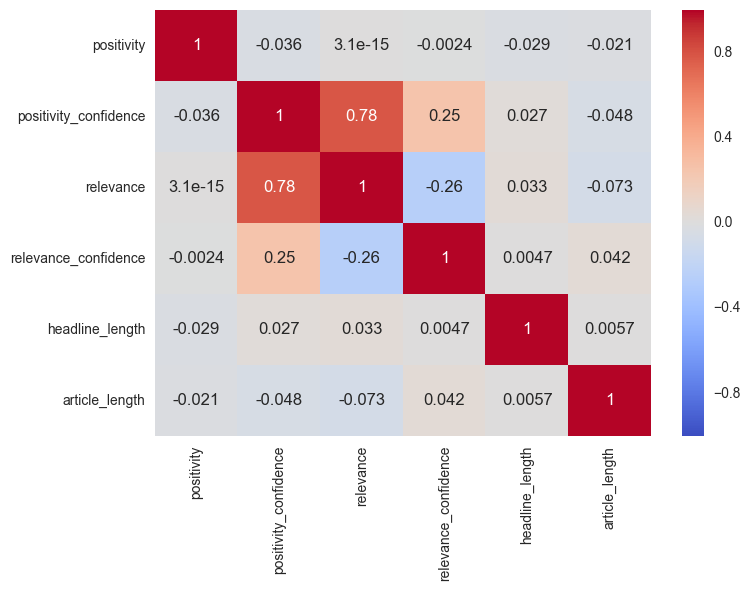

In [82]:
sns.heatmap(economic_df_corr, annot=True, cmap='coolwarm');

We see positive strong positive correlation between `relevance` and `positivity_confidence`.